In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Mount a drive for uploading content
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/Colab Notebooks/UdeSA 2025')

['Full_Dataset_Soccer.csv', 'UEFA Soccer.ipynb']

In [ ]:
#Reads the file and whos the first rows

file_path = '/content/drive/MyDrive/Colab Notebooks/UdeSA 2025/Full_Dataset_Soccer.csv'
df = pd.read_csv(file_path)

df.tail(5)  # Optional: check the first few rows

,Round,Date,Time,Team,Team_Score,Opponent_Score,Opponent,Home_Score_AET,Away_Score_AET,Home_Penalties,Away_Penalties,Team_Points,Opponent_Points,season,Location,Country,Competition
106871,SEMI FINALS,05/04/2023,19:00,WINNER QF 4,NaN,NaN,WINNER QF 3,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106872,SEMI FINALS,05/04/2023,19:00,WINNER QF 2,NaN,NaN,WINNER QF 1,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106873,SEMI FINALS,26/04/2023,19:00,WINNER QF 3,NaN,NaN,WINNER QF 4,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106874,SEMI FINALS,26/04/2023,19:00,WINNER QF 1,NaN,NaN,WINNER QF 2,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup
106875,FINAL,24/05/2023,19:00,WINNER SF 2,NaN,NaN,WINNER SF 1,NaN,NaN,NaN,NaN,NaN,NaN,2022,Away,italy,fa-cup


In [ ]:
df.shape

(106876, 17)

In [ ]:

# -----------------------
# Basic EDA - Quick Overview
# -----------------------

# 1. Shape of the dataset
print("📊 Number of rows and columns:", df.shape)

# 2. Data types
print("\n📁 Column data types:\n", df.dtypes)

# 3. Missing values per column
print("\n🔍 Missing values per column:\n", df.isnull().sum())

# 4. Number of completely empty rows
empty_rows = df.isnull().all(axis=1).sum()
print(f"\n⚠️ Number of completely empty rows: {empty_rows}")

# 5. Unique values in key columns
print("\n🔑 Unique values in key columns:")
for col in ["Location", "Country", "Competition", "season"]:
    print(f"- {col}: {df[col].nunique()} unique values")


📊 Number of rows and columns: (106876, 17)

📁 Column data types:
 Round               object
Date                object
Time                object
Team                object
Team_Score         float64
Opponent_Score     float64
Opponent            object
Home_Score_AET     float64
Away_Score_AET     float64
Home_Penalties     float64
Away_Penalties     float64
Team_Points        float64
Opponent_Points    float64
season               int64
Location            object
Country             object
Competition         object
dtype: object

🔍 Missing values per column:
 Round                   0
Date                    0
Time                    0
Team                    0
Team_Score           2464
Opponent_Score       2464
Opponent                0
Home_Score_AET     103852
Away_Score_AET     103852
Home_Penalties     105070
Away_Penalties     105070
Team_Points          2464
Opponent_Points      2464
season                  0
Location                0
Country                 0
Competition   

In [ ]:
# -----------------------
# Prepare cleaned dataframe
# -----------------------
# Eliminate information if the Team Score, Opponent Score or Team Points is null
# Generate new dataframe df_clean
df_clean = df.dropna(subset=["Team_Score", "Opponent_Score", "Team_Points"]).copy()

# Change format of Date from object to Datetime
df_clean["Date"] = pd.to_datetime(df_clean["Date"], errors='coerce', dayfirst=True)



In [ ]:
# -----------------------
# Matplotlib Visualizations
# -----------------------

# 1. Bar chart: Total goals per season (team + opponent
# This is a new dataframe utilized for graphic generation
goals_per_season = df_clean.groupby("season")[["Team_Score"]].sum()
goals_per_season["Total_Goals"] = goals_per_season["Team_Score"]

In [ ]:
goals_per_season.head()

,Team_Score,Total_Goals
season,,
2002,5697.0,5697.0
2003,5890.0,5890.0
2004,6180.0,6180.0
2005,6033.0,6033.0
2006,6092.0,6092.0


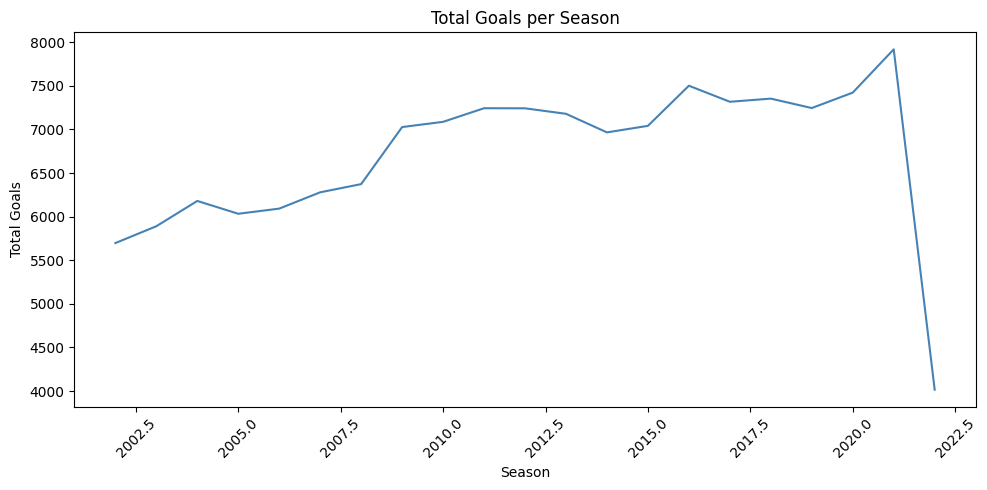

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(goals_per_season.index, goals_per_season["Total_Goals"], color='steelblue')
plt.title("Total Goals per Season")
plt.xlabel("Season")
plt.ylabel("Total Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Bar chart: Number of matches with penalties per season
df_clean["Penalties_Exist"] = (
    df_clean["Home_Penalties"].fillna(0) + df_clean["Away_Penalties"].fillna(0) > 0
)
# Number of matches with goals (independent from the number of goals)
penalty_counts = df_clean[df_clean["Penalties_Exist"]].groupby("season").size()

In [ ]:
df_clean["Penalties_Exist"].head(3)

,Penalties_Exist
0,False
1,False
2,False


In [ ]:
penalty_counts.head(3)

,0
season,
2002,2
2003,2
2004,66


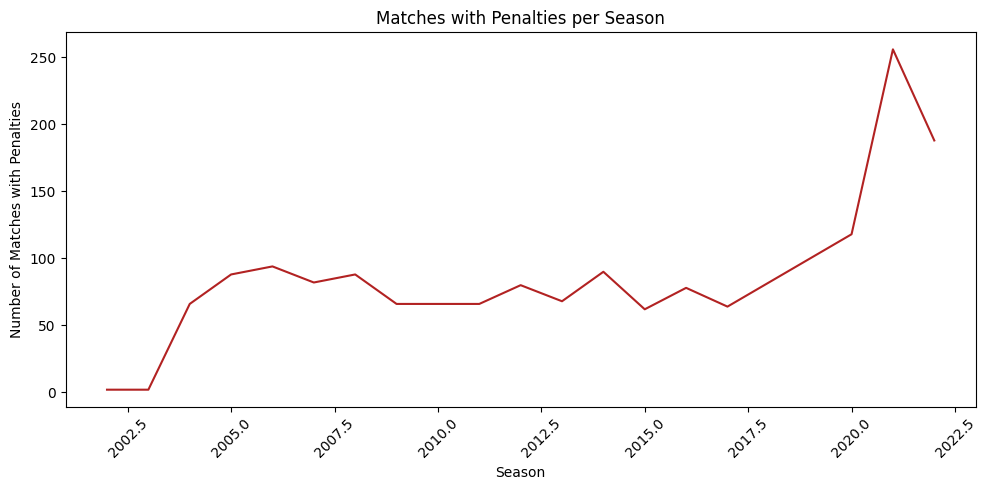

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(penalty_counts.index, penalty_counts.values, color='firebrick')
plt.title("Matches with Penalties per Season")
plt.xlabel("Season")
plt.ylabel("Number of Matches with Penalties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

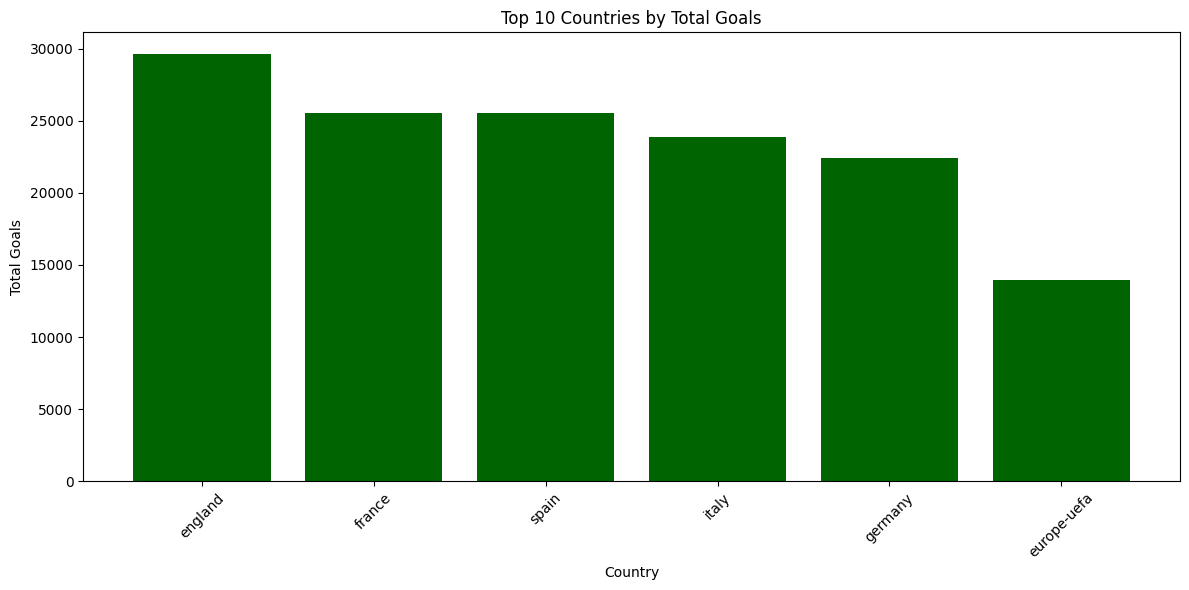

In [ ]:
# 4. Bar chart: Total goals by country (all seasons)
goals_by_country = df_clean.groupby("Country")[["Team_Score", "Opponent_Score"]].sum()
goals_by_country["Total_Goals"] = goals_by_country["Team_Score"]
goals_by_country = goals_by_country.sort_values("Total_Goals", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(goals_by_country.index, goals_by_country["Total_Goals"], color='darkgreen')
plt.title("Top 10 Countries by Total Goals")
plt.xlabel("Country")
plt.ylabel("Total Goals")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

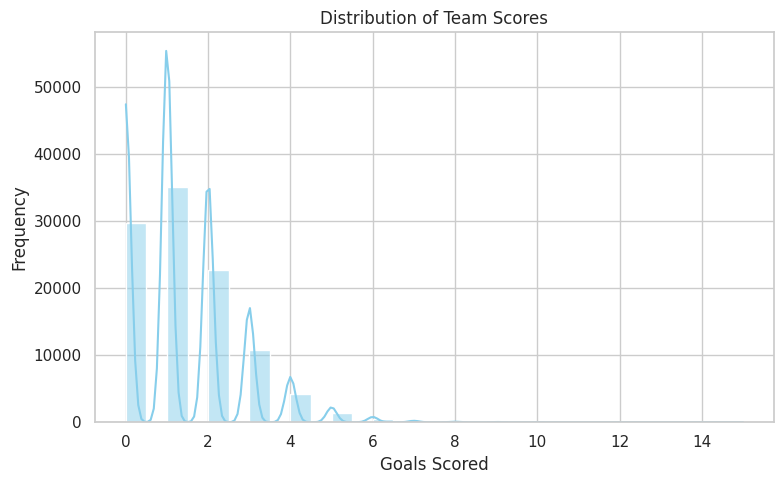

In [ ]:
# -----------------------
# Seaborn Visualizations
# -----------------------

sns.set(style="whitegrid")

# Visualization 1: Distribution of Team Scores
plt.figure(figsize=(8, 5))
sns.histplot(df_clean["Team_Score"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Team Scores")
plt.xlabel("Goals Scored")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



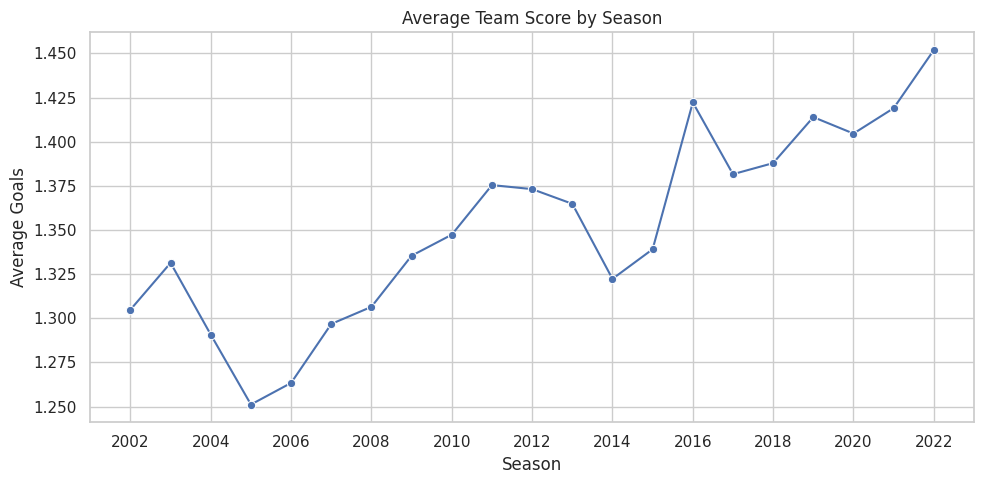

In [ ]:
# Visualization 2: Average Team Score by Season with ticks every 2 years
plt.figure(figsize=(10, 5))
avg_scores = df_clean.groupby("season")["Team_Score"].mean().reset_index()

sns.lineplot(data=avg_scores, x="season", y="Team_Score", marker="o")
plt.title("Average Team Score by Season")
plt.xlabel("Season")
plt.ylabel("Average Goals")

# Set ticks every 2 years
min_season = avg_scores["season"].min()
max_season = avg_scores["season"].max()
plt.xticks(ticks=range(min_season, max_season + 1, 2))

plt.tight_layout()
plt.show()




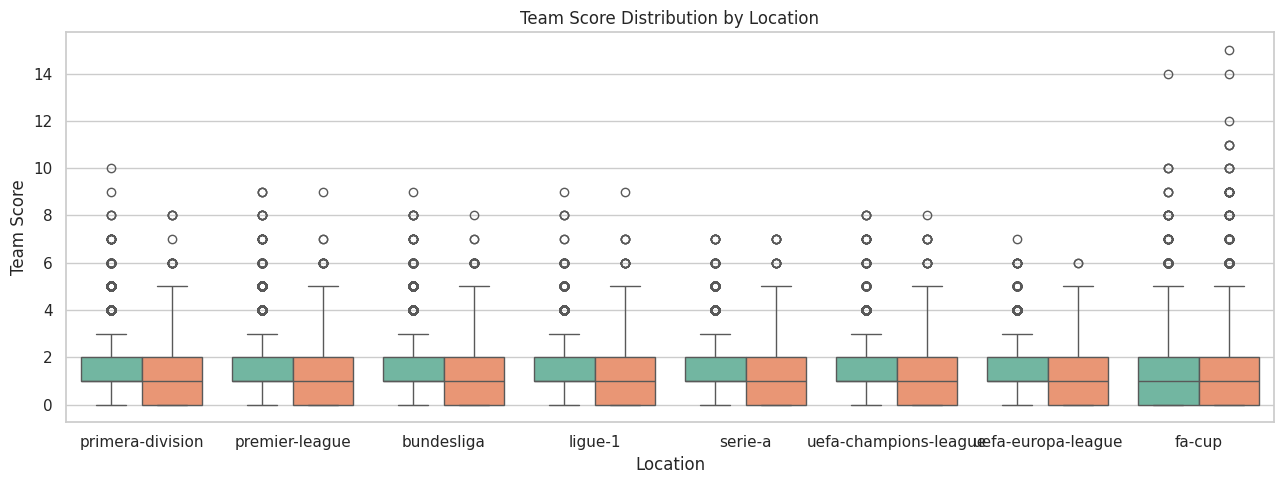

In [ ]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=df_clean, x="Competition", y="Team_Score", hue="Location", palette="Set2", legend=False)
plt.title("Team Score Distribution by Location")
plt.xlabel("Location")
plt.ylabel("Team Score")
plt.tight_layout()
plt.show()




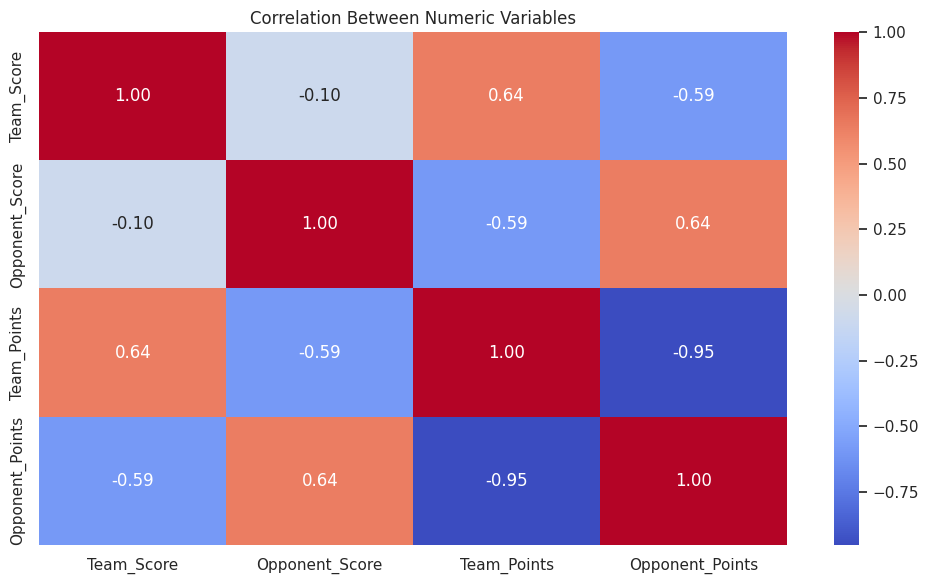

In [ ]:
# Visualization 4: Heatmap of Correlation Between Key Metrics
plt.figure(figsize=(10, 6))
corr = df_clean[["Team_Score", "Opponent_Score", "Team_Points", "Opponent_Points"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Variables")
plt.tight_layout()
plt.show()



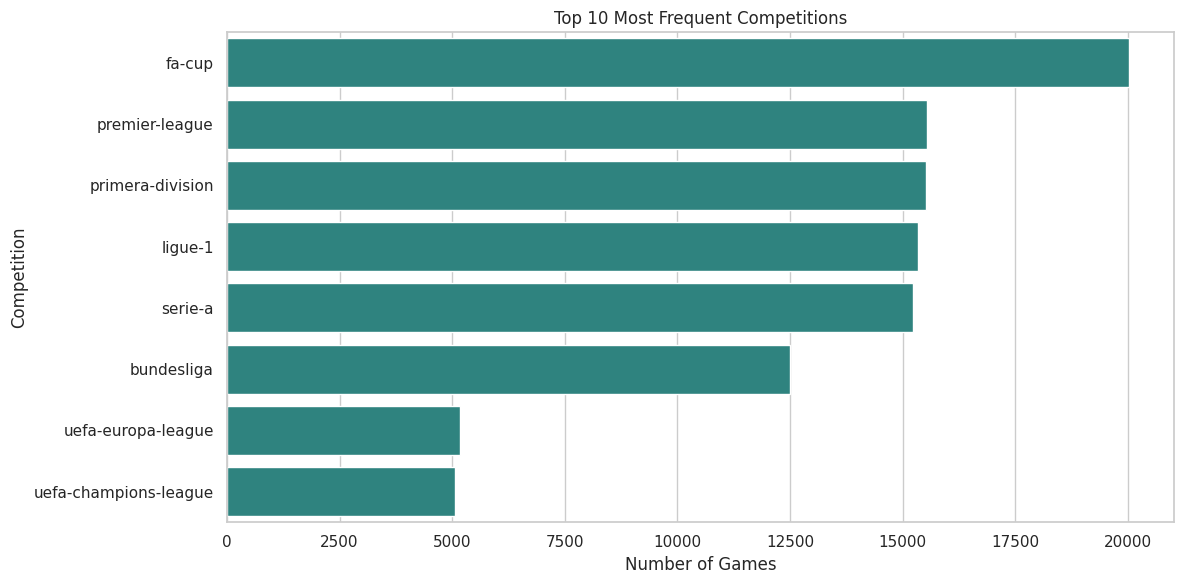

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 10 competitions
top_competitions = df_clean["Competition"].value_counts().nlargest(10).index
filtered_df = df_clean[df_clean["Competition"].isin(top_competitions)].copy()

# Create the plot
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y="Competition", order=top_competitions, color=sns.color_palette("viridis", n_colors=1)[0])

plt.title("Top 10 Most Frequent Competitions")
plt.xlabel("Number of Games")
plt.ylabel("Competition")
plt.tight_layout()
plt.show()
